# **Laboratório 04 - Ajuste de Curvas via Funções de Base Radial (RBF)**

Aluno : Daniel Medeiros Soares Carneiro (20220012347)

**Exemplo 01 :** Sejam $x,\,y$ o seguinte conjunto de pontos:

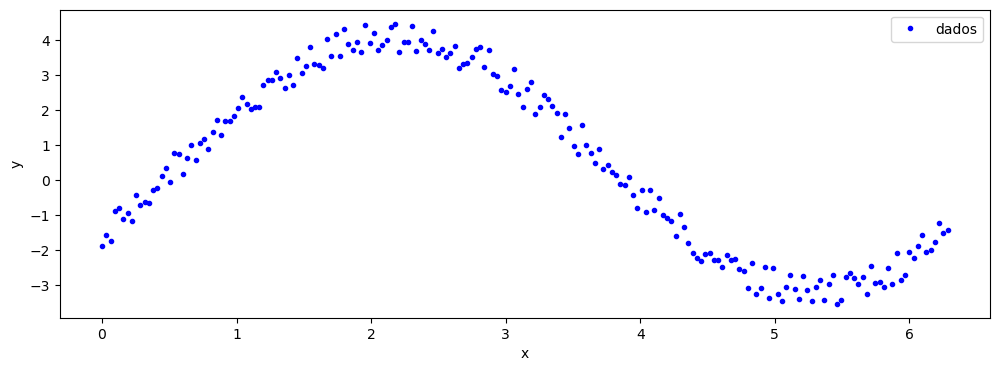

In [2]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 200)
y = 3*np.sin(x) - 2*np.cos(x) + np.random.random(len(x))
plt.figure(figsize = (12, 4))
plt.plot(x,y,"b.", label = "dados")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

### Ajuste via Funções de Base Radial (RBF) : Ajuste empírico.

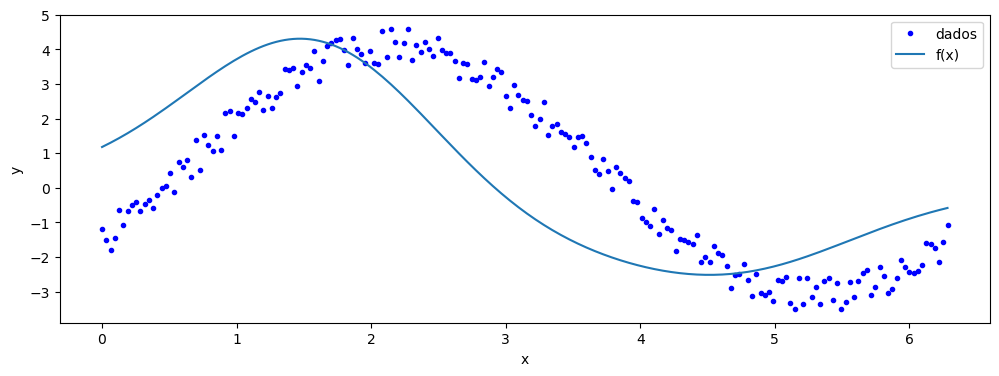

In [4]:
c = np.linspace(x[0],x[-1],5)
s2 = .9

phi_0 = np.exp(-(1/(2*s2**2))*(x - c[0])**2)
phi_1 = np.exp(-(1/(2*s2**2))*(x - c[1])**2)
phi_2 = np.exp(-(1/(2*s2**2))*(x - c[2])**2)
phi_3 = np.exp(-(1/(2*s2**2))*(x - c[3])**2)
phi_4 = np.exp(-(1/(2*s2**2))*(x - c[4])**2)

x = np.linspace(0, 2*np.pi, 200)
y = 3*np.sin(x) - 2*np.cos(x) + np.random.random(len(x))
plt.figure(figsize = (12, 4))
plt.plot(x,y,"b.", label = "dados")
#plt.plot(x,-1*phi_0,label = "phi_0")
#plt.plot(x,3.5*phi_1,label = "phi_1")
#plt.plot(x,-3*phi_2,label = "phi_2")
#plt.plot(x,-4*phi_3,label = "phi_3")
plt.plot(x,0.2*phi_0 + 4.5*phi_1 - 1.2*phi_2 - 2.2*phi_3 - 0.1*phi_4,label = "f(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

**Exemplo 02 :** Suponha a medição da temperatura ao longo de 19 horas, representadas pelo
seguinte conjunto de dados,

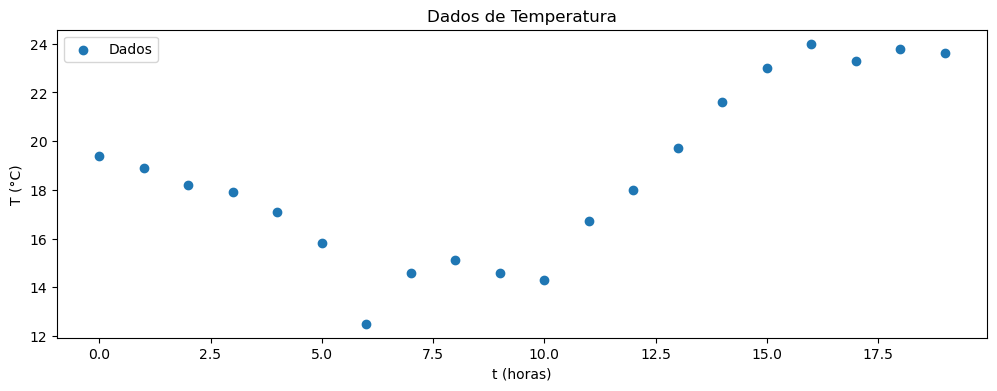

In [6]:
t = np.linspace(0,19,20)  # tempo (em horas)
T = np.array([19.4,18.9,18.2,17.9,17.1,15.8,12.5,14.6,15.1,14.6,14.3,
              16.7,18,19.7,21.6,23,24,23.3,23.8,23.6])  # temperatura (em Celsius)

plt.figure(figsize=(12, 4))
plt.scatter(t, T, label='Dados')
plt.xlabel("t (horas)")
plt.ylabel("T (°C)")
plt.title("Dados de Temperatura")
plt.legend()
plt.show()

### Ajuste via Funções de Base Radial (RBF) : Resolução de um Sistema de Equações Lineares.

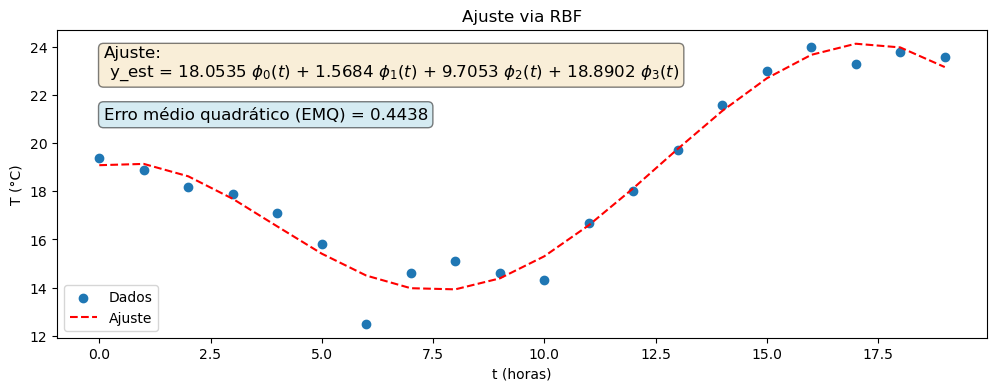

In [8]:
c = np.linspace(0, 19, 4)
phi = np.zeros(shape=(len(t), len(c)))

s2 = 4.9

for k in range(len(t)):
    for i in range(len(c)):
        phi[k, i] = np.exp(-(1 / (2 * (s2 ** 2))) * (t[k] - c[i]) ** 2)

w = np.dot(la.pinv(phi), T)

y_est = phi @ w

EMQ = (1 / len(t)) * (sum((T - y_est) ** 2))
#print("O Erro médio quadrático (EMQ) = %.4f" % EMQ)

plt.figure(figsize=(12, 4))
plt.scatter(t, T, label='Dados')
plt.plot(t, y_est, "--r", label='Ajuste')

fit_label = 'Ajuste:\n y_est = %.4f $\\phi_0(t)$ + %.4f $\\phi_1(t)$ + %.4f $\\phi_2(t)$ + %.4f $\\phi_3(t)$' % (
    w[0].item(), w[1].item(), w[2].item(), w[3].item())
plt.text(0.05, 0.95, fit_label, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.5))
plt.text(0.05, 0.75, "Erro médio quadrático (EMQ) = %.4f" % EMQ, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle="round", facecolor='lightblue', alpha=0.5))
plt.xlabel("t (horas)")
plt.ylabel("T (°C)")
plt.title("Ajuste via RBF")
plt.legend()
plt.show()

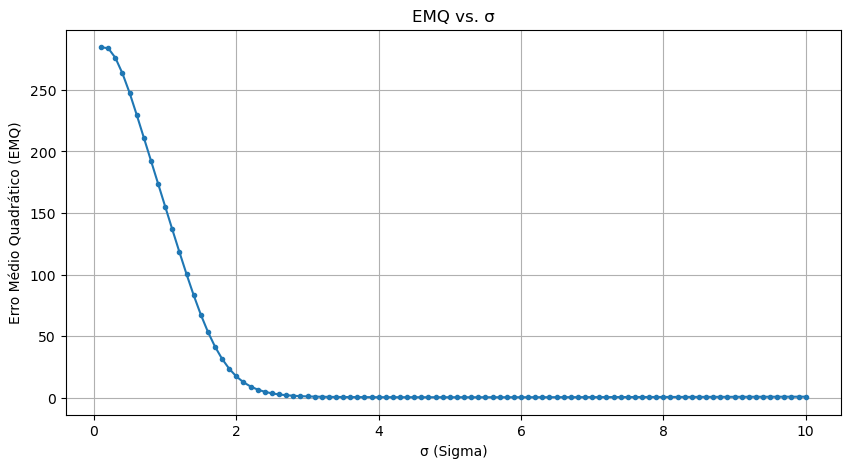

In [9]:
c = np.linspace(0, 19, 4)

sigma_range = np.linspace(0.1, 10, 100)
EMQ_values = []

for sigma in sigma_range:
    phi = np.zeros((len(t), len(c)))
    
    for k in range(len(t)):
        for i in range(len(c)):
            phi[k, i] = np.exp(-(1 / (2 * (sigma ** 2))) * (t[k] - c[i]) ** 2)
    
    w = la.pinv(phi) @ T
    y_est = phi @ w
    EMQ = (1 / len(t)) * np.sum((T - y_est) ** 2)
    
    EMQ_values.append(EMQ)

plt.figure(figsize=(10, 5))
plt.plot(sigma_range, EMQ_values, '-o', markersize=3)
plt.xlabel("σ (Sigma)")
plt.ylabel("Erro Médio Quadrático (EMQ)")
plt.title("EMQ vs. σ")
plt.grid(True)
plt.show()


**Atividade 01** - Seja o seguinte conjunto de pontos,

$$
\begin{aligned}
&\\
&\begin{array}{lllllll}
\hline \hline  &  \\
\hline \text { $x_k$ } & -1,0 & -0,6 & -0,2 & 0,2 & 0,6 & 1,0\\
\hline \text { $y_k$ } & -0,9602 & 0,6405 & -0,1647 & 0,34449 & -0,3201\\
\hline \text { $c_i$ } & -1,5 & -0,5 & 0,0 & 0,4 & 1,0 & --\\
\hline
\end{array}
\end{aligned}
$$

encontre a função analiticamente e, em seguida, implemente-a mostrando os respectivos gráficos e a qualidade do ajuste

\begin{equation*}
f(x) = a_0 \phi_0(x) + a_1 \phi_1(x) + a_2 \phi_2(x) + a_3 \phi_3(x) + a_4 \phi_4(x)
\end{equation*}

com $\phi_i(x_k) = exp\left ( -\left ( 2\sigma^2 \right )^{-1}\left ( x_k - c_i \right )^2 \right ),\,i = 0,1,\cdots, 4$ (e, $\sigma$ definido pelo usuário) que melhor ajusta o conjunto de pontos. De modo que $EMQ \leq 0,03.$

**Atividade 02** - Seja o seguinte conjunto de pontos,

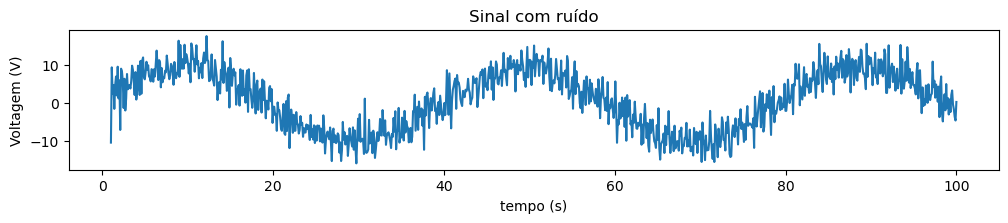

In [12]:
# Gerando o sinal a ser filtrado
t = np.linspace(1, 100, 1000)
x_volts = 10*np.sin(t/(2*np.pi))

#Gerando o sinal ruidoso e apresentando os gráficos comparativos

t_ruido_db = 10 # Potência do ruído em dB

t_ruido_watts = 10 ** (t_ruido_db / 10) # Convertendo a potência para Watts
x_watts = x_volts ** 2

# Gerando amostras do ruído
media_ruido = 0
ruido_volts = np.random.normal(media_ruido, np.sqrt(t_ruido_watts), len(x_watts))

y_volts = x_volts + ruido_volts # Sinal acréscido do ruído

plt.figure(figsize = (12, 4))
plt.subplot(212)
plt.plot(t, y_volts) # plot sinal + ruído
plt.title('Sinal com ruído')
plt.ylabel('Voltagem (V)')
plt.xlabel('tempo (s)')
plt.show()

Ajuste-o via:

\begin{equation*}
f(x) = a_0 \phi_0(x) + a_1 \phi_1(x) + a_2 \phi_2(x) + a_3 \phi_3(x) + a_4 \phi_4(x)
\end{equation*}

com $\phi_i(x_k) = exp\left ( -\left ( 2\sigma^2 \right )^{-1}\left ( x_k - c_i \right )^2 \right ),\,i = 0,1,\cdots, 4$ (e, $\sigma$ definido pelo usuário) que melhor ajusta o conjunto de pontos.

**Atividade 03** - Ajuste o seguinte conjunto de dados via RBF, utilizando 
* 500 amostras para o treinamento,
* 500 amostras para o teste e,
* 500 amostras para validação.

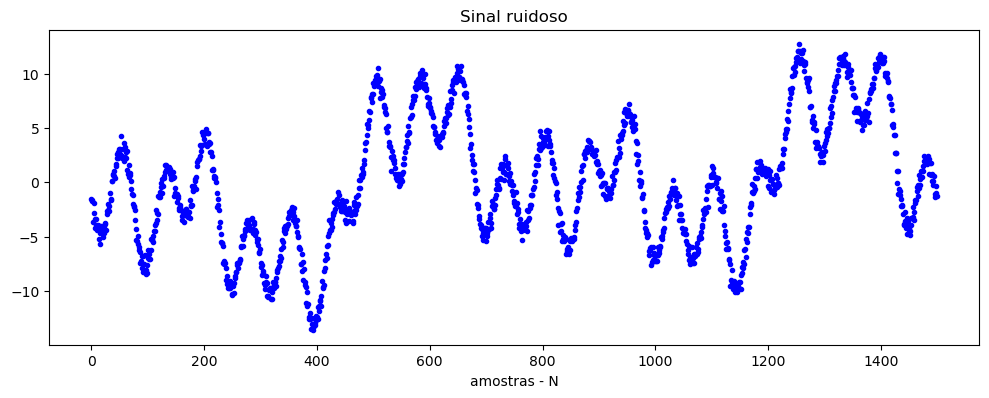

In [15]:
# criando os dados
N = 1500
t = np.linspace([-np.pi, -np.pi/2, -2*np.pi, 0],
[np.pi, np.pi/2, 2*np.pi, 2*np.pi], num = N)
x = np.sin(t) + np.cos(2*t) + np.sin(10*t) #Sinal de entrada
#x = np.sin(np.random.normal(0, 1, (N, 4))) # sinal de entrada
v = np.random.normal(0, 0.5, N) # ruído
d = 2*x[:,0] + 0.1*x[:,1] - 4*x[:,2] + 0.5*x[:,3] + v # desejado + ruído

# Resultados obtidos
plt.figure(figsize=(12,9))
plt.subplot(211);plt.title("Sinal ruidoso");plt.xlabel("amostras - N")
plt.plot(d,"b.", label="d - sinal ruidoso")
plt.show()